# Resultats - Risque de credit (PD binaire)

Objectif : presenter les performances et l'interpretabilite des modeles, en lien
avec les fichiers produits par les pipelines.

## 1) Setup

In [1]:
from pathlib import Path
import sys
import os


def find_project_root(start: Path) -> Path:
    for path in [start] + list(start.parents):
        if (path / "src").is_dir():
            return path
    raise FileNotFoundError("Project root with 'src' not found")


root = find_project_root(Path.cwd())
os.chdir(root)
if str(root) not in sys.path:
    sys.path.append(str(root))

import pandas as pd
from IPython.display import Image, display


## 2) Performances (AUC/KS)

In [2]:
logit = pd.read_csv('figures/tables/logit_metrics.csv')
logit_ns = pd.read_csv('figures/tables/logit_metrics_nosensitive.csv')
xgb = pd.read_csv('figures/tables/xgb_metrics.csv')
rf = pd.read_csv('figures/tables/rf_metrics.csv')
lgbm = pd.read_csv('figures/tables/lgbm_metrics.csv')

perf = pd.DataFrame([
    {'Model': 'Logit', 'AUC': logit['auc'].iloc[0], 'KS': logit['ks'].iloc[0]},
    {'Model': 'Logit (no sensitive)', 'AUC': logit_ns['auc'].iloc[0], 'KS': logit_ns['ks'].iloc[0]},
    {'Model': 'XGBoost', 'AUC': xgb['auc'].iloc[0], 'KS': xgb['ks'].iloc[0]},
    {'Model': 'Random Forest', 'AUC': rf['auc'].iloc[0], 'KS': rf['ks'].iloc[0]},
    {'Model': 'LightGBM', 'AUC': lgbm['auc'].iloc[0], 'KS': lgbm['ks'].iloc[0]},
])
perf

,Model,AUC,KS
0,Logit,0.802500,0.507143
1,Logit (no sensitive),0.802381,0.523810
2,XGBoost,0.782857,0.423810
3,Random Forest,0.792381,0.454762
4,LightGBM,0.782738,0.428571


## 3) Courbes ROC

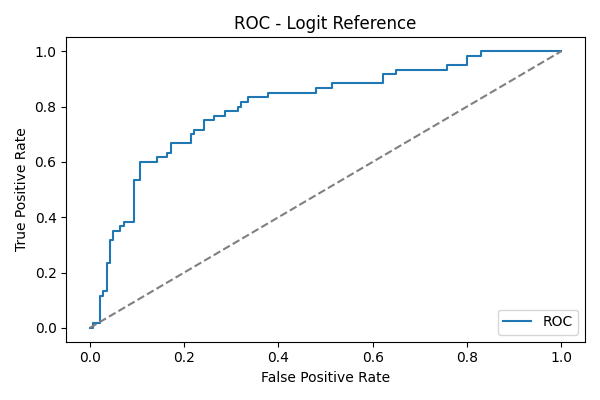

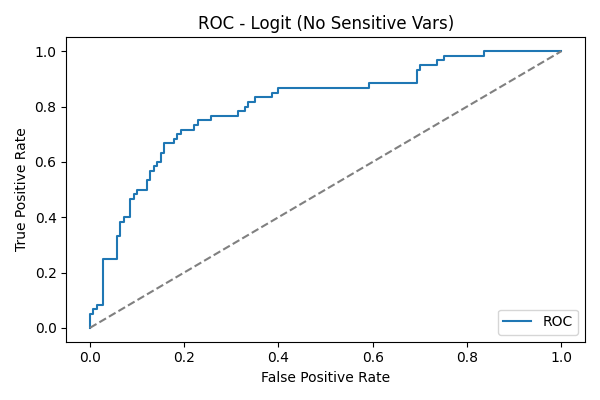

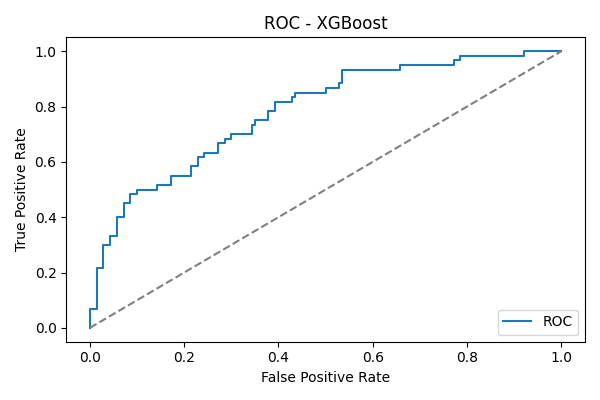

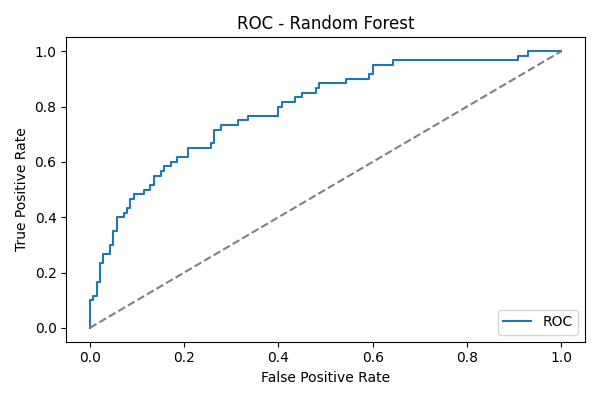

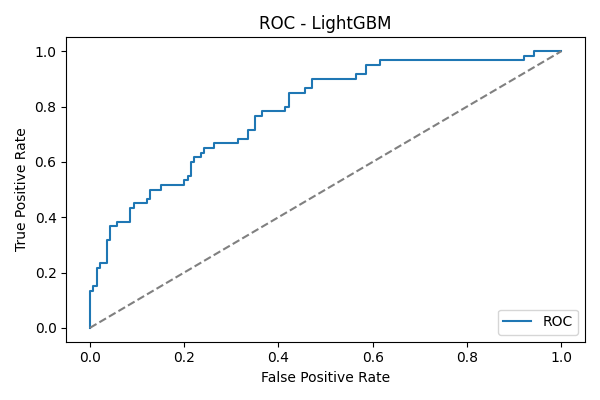

In [3]:
plots = [
    ('logit', 'figures/plots/logit_roc.png'),
    ('logit_nosensitive', 'figures/plots/logit_roc_nosensitive.png'),
    ('xgb', 'figures/plots/xgb_roc.png'),
    ('rf', 'figures/plots/rf_roc.png'),
    ('lgbm', 'figures/plots/lgbm_roc.png'),
]
for name, path in plots:
    display(Image(filename=path))


## 4) Cross-validation logit

In [4]:
cv = pd.read_csv('figures/tables/logit_cv_summary.csv')
cv

,index,auc,ks
0,mean,0.773119,0.447143
1,std,0.026935,0.043461


## 5) Interpretabilite ML (SHAP)

In [5]:
xgb_shap = pd.read_csv('figures/tables/xgb_shap_importance.csv')
lgbm_shap = pd.read_csv('figures/tables/lgbm_shap_importance.csv')
xgb_shap.head(10)

,feature,mean_abs_shap
0,Comptes_A14,0.763785
1,Duree_credit,0.447263
2,Montant_credit,0.438052
3,Historique_credit_A34,0.300947
4,Epargne,0.281677
5,Anciennete_emploi,0.240017
6,Autres_credits_A143,0.225685
7,Objet_credit_A43,0.183137
8,Taux_effort,0.170147
9,Objet_credit_A41,0.167605


In [6]:
lgbm_shap.head(10)

,feature,mean_abs_shap
0,Comptes_A14,1.765409
1,Montant_credit,1.160626
2,Duree_credit,0.956851
3,Historique_credit_A34,0.674784
4,Epargne,0.624615
5,Anciennete_emploi,0.601690
6,Age,0.471073
7,Autres_credits_A143,0.471009
8,Objet_credit_A41,0.412182
9,Objet_credit_A43,0.364506


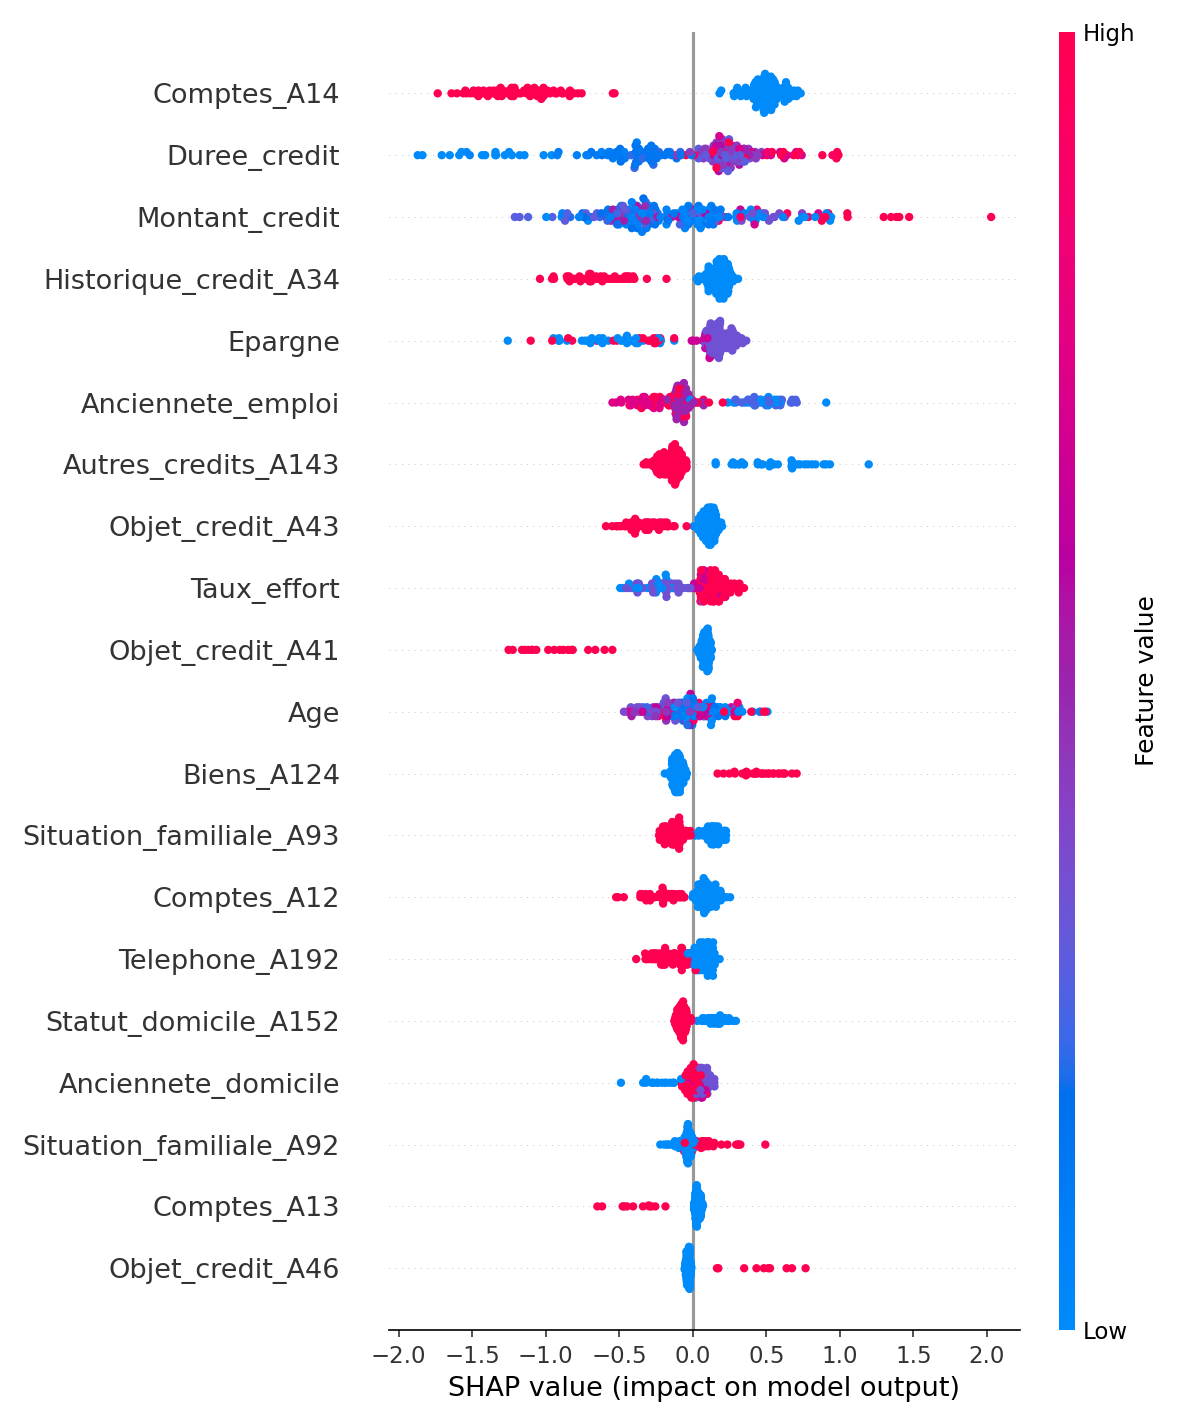

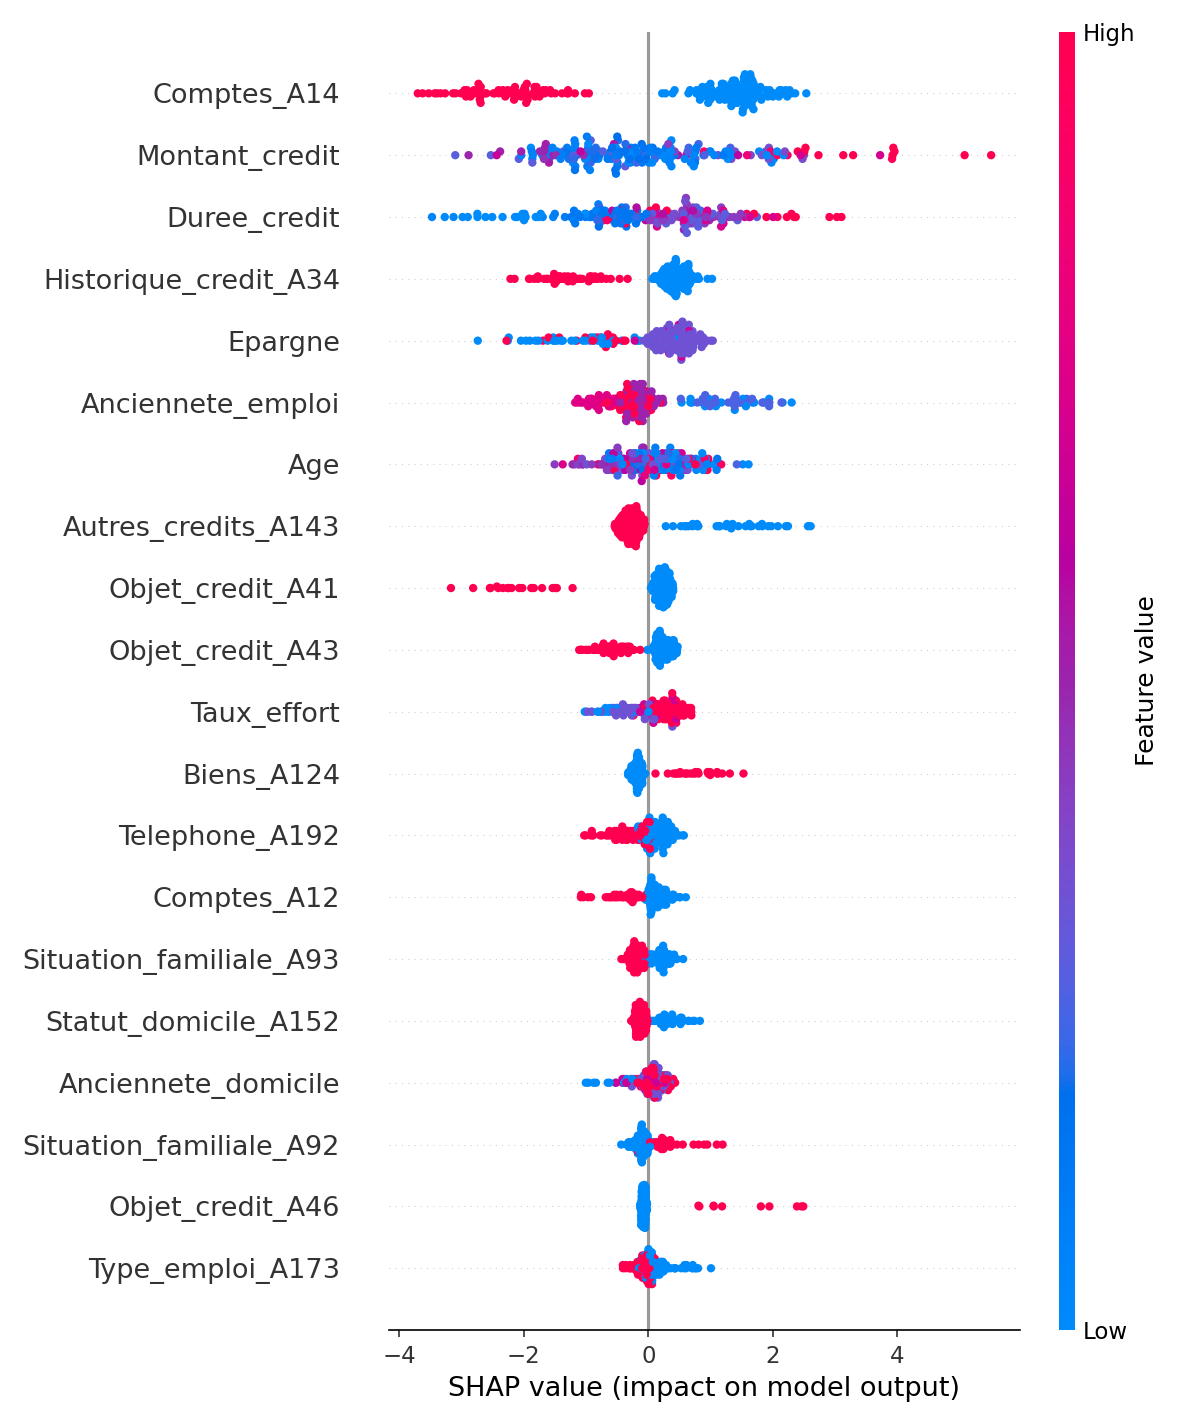

In [7]:
display(Image(filename='figures/plots/xgb_shap_summary.png'))
display(Image(filename='figures/plots/lgbm_shap_summary.png'))

## 5.1) SHAP Random Forest


In [8]:
rf_shap = pd.read_csv('figures/tables/rf_shap_importance.csv')
rf_shap.head(10)


,feature,mean_abs_shap
0,Comptes_A14,0.083275
1,Duree_credit,0.043042
2,Historique_credit_A34,0.025300
3,Anciennete_emploi,0.023199
4,Montant_credit,0.022538
5,Epargne,0.018825
6,Taux_effort,0.015652
7,Autres_credits_A143,0.015543
8,Statut_domicile_A152,0.014161
9,Biens_A124,0.013156


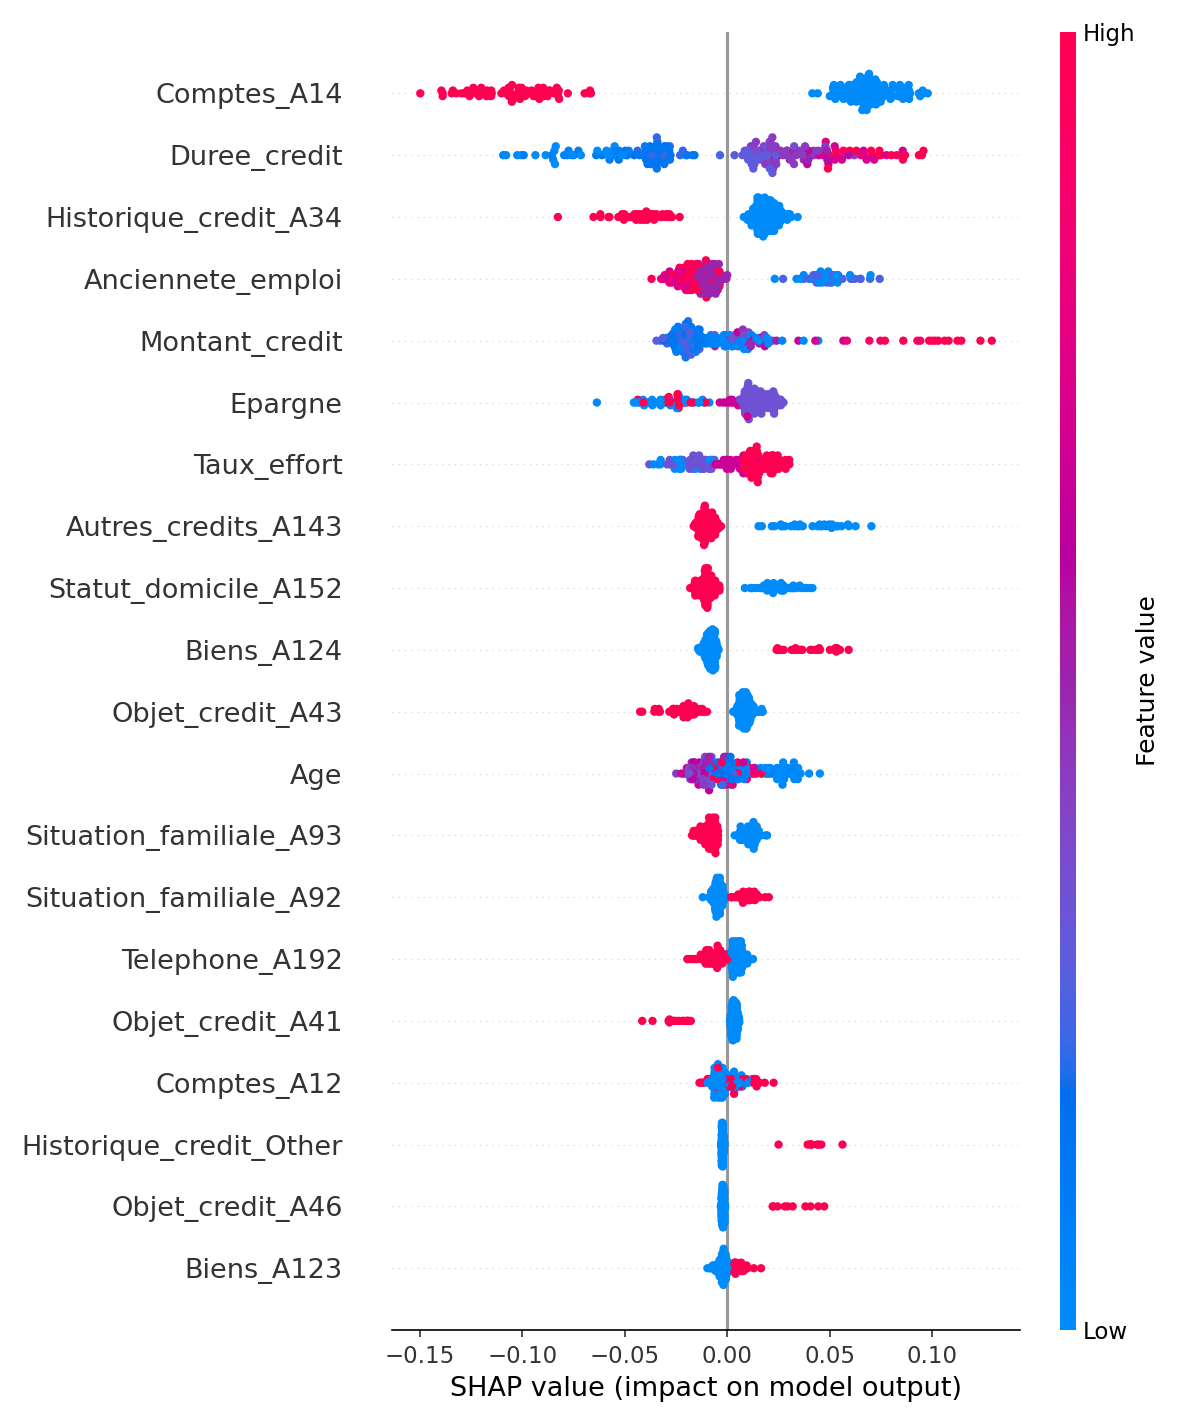

In [9]:
display(Image(filename='figures/plots/rf_shap_summary.png'))


## 6) Importance Random Forest

In [10]:
rf_imp = pd.read_csv('figures/tables/rf_feature_importance.csv')
rf_imp.head(10)

,feature,importance
0,Comptes_A14,0.140115
1,Montant_credit,0.131767
2,Duree_credit,0.108784
3,Age,0.083415
4,Anciennete_emploi,0.055633
5,Epargne,0.047237
6,Taux_effort,0.041837
7,Historique_credit_A34,0.037256
8,Anciennete_domicile,0.027369
9,Autres_credits_A143,0.027171


## 7) Exemples de scoring (nouveaux clients)

Lecture: score de defaut (pd_hat) et classe predites.


In [11]:
preds = pd.read_csv('data/processed/predictions_new_clients.csv')
preds[['pd_hat','default_pred']].describe()


,pd_hat,default_pred
count,12.000000,12.000000
mean,0.511394,0.500000
std,0.335206,0.522233
min,0.011570,0.000000
25%,0.238776,0.000000
50%,0.458982,0.500000
75%,0.812708,1.000000
max,0.969752,1.000000


In [12]:
preds.sort_values('pd_hat', ascending=False).head(5)


,Duree_credit,Montant_credit,Taux_effort,Anciennete_domicile,Age,Nb_credits,Nb_pers_charge,Comptes,Historique_credit,Objet_credit,...,Biens,Autres_credits,Statut_domicile,Type_emploi,Telephone,Etranger,Epargne,Anciennete_emploi,pd_hat,default_pred
8,71,13370,2,2,42,3,0,A11,A31,A40,...,A124,A143,A153,A172,A192,A201,A65,A73,0.969752,1
5,60,4198,4,1,63,3,2,A13,A32,A47,...,A123,A142,A152,A173,A191,A201,A62,A71,0.938320,1
3,66,14959,2,4,42,1,2,A12,A30,A45,...,A122,A141,A153,A172,A191,A201,A63,A74,0.910993,1
7,70,4488,2,2,74,3,0,A11,A34,A40,...,A124,A141,A152,A173,A191,A202,A63,A74,0.779946,1
10,28,18194,2,3,44,1,2,A14,A31,A48,...,A124,A142,A153,A172,A191,A201,A63,A75,0.683348,1


## 7.1) Explication locale (logit) - top 5 risques

Contributions en log-odds par variable (top 5).


In [13]:
local_contrib = pd.read_csv('reports/draft/new_clients_top5_logit_contrib.csv')
local_contrib


,index,pd_hat,default_pred,feat_1,logit_contrib_1,feat_2,logit_contrib_2,feat_3,logit_contrib_3,feat_4,logit_contrib_4,feat_5,logit_contrib_5
0,8,0.969752,1,Duree_credit,1.632492,Montant_credit,1.463507,Biens_A124,1.346073,Statut_domicile_A153,-1.278004,Autres_credits_A143,-0.760873
1,5,0.938320,1,Duree_credit,1.379571,Taux_effort,1.323328,Comptes_A13,-0.777213,Nb_credits,0.665478,Nb_pers_charge,0.567834
2,3,0.910993,1,Montant_credit,1.637443,Duree_credit,1.517528,Statut_domicile_A153,-1.278004,Taux_effort,0.661664,Historique_credit_Other,0.586012
3,7,0.779946,1,Duree_credit,1.609499,Etranger_Other,-1.582228,Biens_A124,1.346073,Historique_credit_A34,-1.033059,Nb_credits,0.665478
4,10,0.683348,1,Montant_credit,1.991552,Comptes_A14,-1.765821,Biens_A124,1.346073,Statut_domicile_A153,-1.278004,Anciennete_emploi,-0.723355


## 8) Matrices de confusion (logit)

Comparaison seuil 0.5 vs seuil KS-optimal (choisi sur train).


In [14]:
cm_summary = pd.read_csv('figures/tables/logit_confusion_summary.csv')
cm_summary


,threshold,tp,fp,tn,fn,precision,recall,accuracy,label
0,0.500000,35,15,125,25,0.70000,0.583333,0.800,fixed_0.5
1,0.341986,45,34,106,15,0.56962,0.750000,0.755,ks_optimal


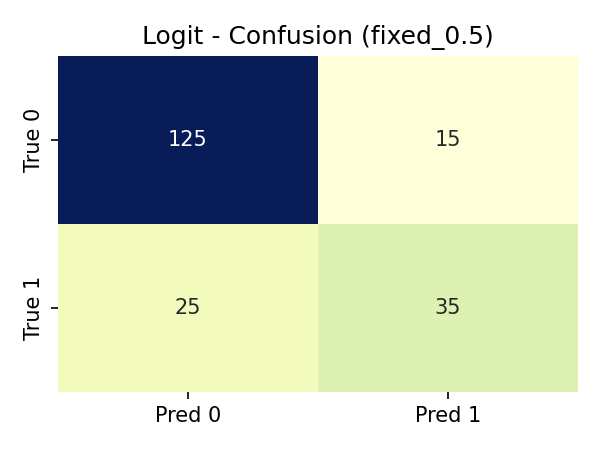

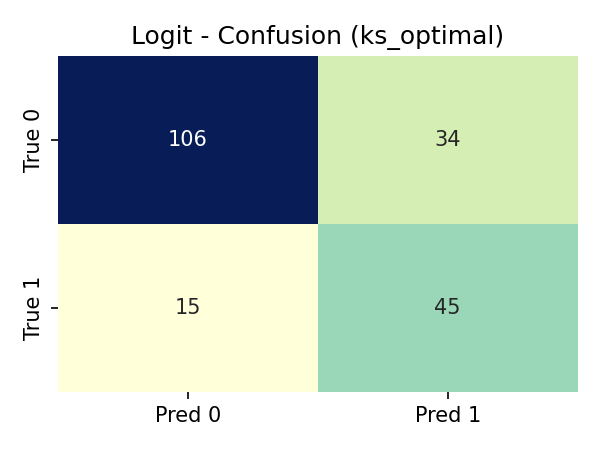

In [15]:
display(Image(filename='figures/plots/logit_confusion_fixed_0.5.png'))
display(Image(filename='figures/plots/logit_confusion_ks_optimal.png'))


Interpretation (test set):
- Seuil 0.5: precision ~0.70, recall ~0.58, accuracy ~0.80.
- Seuil KS-optimal: recall ~0.75, precision ~0.57, accuracy ~0.76.
Trade-off: plus de defauts detectes vs plus de faux positifs.
